In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [70]:
#Importing Oil Wells Data
df = pd.read_csv('Oil_Wells.csv')

In [71]:
# Define the specific values for each column
values_to_keep_FieldName = ['Beverly Hills', 'Inglewood']  # Replace 'Value1' and 'Value2' with your desired values
values_to_keep_WellStatus = ['P', 'A', 'I']  # Replace 'Status1', 'Status2', and 'Status3' with your desired values

In [72]:
# Filter the DataFrame based on the specific values in both columns
filtered_df = df[
    (df['FieldName'].isin(values_to_keep_FieldName)) & 
    (df['WellStatus'].isin(values_to_keep_WellStatus))
]

In [73]:
# Group the filtered DataFrame by the 'FieldName' and 'WellStatus' columns and aggregate the data
grouped_df = filtered_df.groupby(['FieldName', 'WellStatus']).size().unstack(fill_value=0)


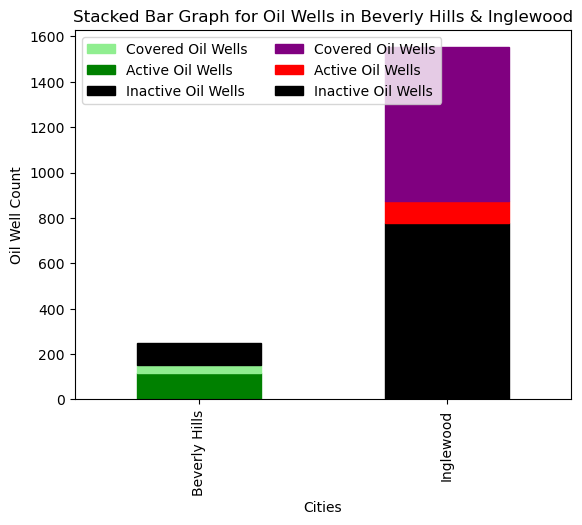

In [101]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Group the filtered DataFrame by the 'FieldName' and 'WellStatus' columns and aggregate the data
grouped_df = filtered_df.groupby(['FieldName', 'WellStatus']).size().unstack(fill_value=0)

# Define colors for the bars
bar_colors = {
    'Beverly Hills': {'P': 'lightgreen', 'A': 'green', 'I': 'black'},
    'Inglewood': {'P': 'purple', 'A': 'red', 'I': 'black'},
}

# Plot the stacked bar graph with specified colors for each category
ax = grouped_df.plot(kind='bar', stacked=True)

# Customize individual bar colors
for i, (city, colors) in enumerate(bar_colors.items()):
    for j, status in enumerate(grouped_df.columns):
        ax.get_children()[3*i + j].set_color(colors[status])

# Add labels and title
plt.xlabel('Cities')
plt.ylabel('Oil Well Count')
plt.title('Stacked Bar Graph for Oil Wells in Beverly Hills & Inglewood')

# Remove the default legend
ax.legend().remove()

# Create custom legends
legend1_handles = [
    mpatches.Patch(color='lightgreen', label='Covered Oil Wells'),
    mpatches.Patch(color='green', label='Active Oil Wells'),
    mpatches.Patch(color='black', label='Inactive Oil Wells')
]

legend2_handles = [
     mpatches.Patch(color='purple', label='Covered Oil Wells'),
    mpatches.Patch(color='red', label='Active Oil Wells'),
    mpatches.Patch(color='black', label='Inactive Oil Wells')
]

# Combine legend handles
all_handles = legend1_handles + legend2_handles

# Position the legend with two columns
plt.legend(handles=all_handles, loc='upper left', bbox_to_anchor=(0, 1), ncol=2)

# Save the plot as a PNG file
plt.savefig('stacked_bar_graph.png', bbox_inches='tight')

# Show the plot
plt.show()


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [76]:
#Importing a new dataframe that gauges various health conditions and has a socio vulnerability index, changing the Census Tract, California County and approximate location to string values 
df = pd.read_csv('Calenviroscreen4.csv',
    dtype=
    {
        'Census Tract':str,
        'California County':str,
        'Approximate Location': str
    }
)
df.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.18,100.00,95-100% (highest scores),...,79.37,76.0,98.92,12.8,93.83,30.3,91.04,93.16,9.66,99.72
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.65,99.99,95-100% (highest scores),...,95.53,73.2,98.39,19.8,99.21,31.2,92.28,93.17,9.66,99.74
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,95-100% (highest scores),...,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.33,99.96,95-100% (highest scores),...,78.71,65.7,95.35,15.7,97.35,35.4,96.41,94.64,9.82,99.89
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.75,99.95,95-100% (highest scores),...,86.56,72.7,98.30,13.7,95.29,32.7,94.16,95.40,9.90,99.95


In [77]:
# look at the data types, verbose = True shows all the counts
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   object 
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8   CES 4.0 Percentile           7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        

In [78]:
# Choosing all columns with data I want to keep
columns_to_keep = ['Census Tract',
                   'Total Population',
                   'California County',
                   'Approximate Location',
                   'CES 4.0 Score',
                   'CES 4.0 Percentile',
                   'Pollution Burden Score',
                   'Pop. Char. Pctl',
                   'PM2.5 Pctl',
                   'Lead Pctl',
                   'Tox. Release Pctl',
                   'Cleanup Sites Pctl',
                   'Asthma Pctl',
                   'Cardiovascular Disease Pctl',
                   'Low Birth Weight Pctl',
                  'Haz. Waste Pctl','Ozone Pctl']

df2 = df[columns_to_keep]
df2.info

<bound method DataFrame.info of      Census Tract  Total Population California County  \
0      6019001100              2780           Fresno    
1      6077000700              4680       San Joaquin   
2      6037204920              2751       Los Angeles   
3      6019000700              3664           Fresno    
4      6019000200              2689           Fresno    
...           ...               ...               ...   
8030   6107004000               582           Tulare    
8031   6109985202              2509         Tuolumne    
8032   6111001206               778          Ventura    
8033   6111003012               675          Ventura    
8034   6111980000               118          Ventura    

                     Approximate Location  CES 4.0 Score  CES 4.0 Percentile  \
0                                  Fresno          93.18              100.00   
1                                Stockton          86.65               99.99   
2                             Los Angeles  

In [79]:
#narrowing down to only see Inglewood
df2Inglewood = df2[df2['Approximate Location'] == 'Inglewood']

In [80]:
#narrowing down to only see Beverly Hills
df2BeverlyHills = df2[df2['Approximate Location'] == 'Beverly Hills']

In [81]:
# Verifying the variables in Inglewood
df2Inglewood.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 172 to 3871
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 27 non-null     object 
 1   Total Population             27 non-null     int64  
 2   California County            27 non-null     object 
 3   Approximate Location         27 non-null     object 
 4   CES 4.0 Score                27 non-null     float64
 5   CES 4.0 Percentile           27 non-null     float64
 6   Pollution Burden Score       27 non-null     float64
 7   Pop. Char. Pctl              27 non-null     float64
 8   PM2.5 Pctl                   27 non-null     float64
 9   Lead Pctl                    27 non-null     float64
 10  Tox. Release Pctl            27 non-null     float64
 11  Cleanup Sites Pctl           27 non-null     float64
 12  Asthma Pctl                  27 non-null     float64
 13  Cardiovascular Disease 

In [82]:
# Verifying the variables in Beverly Hills
df2BeverlyHills.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 3932 to 5758
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 7 non-null      object 
 1   Total Population             7 non-null      int64  
 2   California County            7 non-null      object 
 3   Approximate Location         7 non-null      object 
 4   CES 4.0 Score                7 non-null      float64
 5   CES 4.0 Percentile           7 non-null      float64
 6   Pollution Burden Score       7 non-null      float64
 7   Pop. Char. Pctl              7 non-null      float64
 8   PM2.5 Pctl                   7 non-null      float64
 9   Lead Pctl                    7 non-null      float64
 10  Tox. Release Pctl            7 non-null      float64
 11  Cleanup Sites Pctl           7 non-null      float64
 12  Asthma Pctl                  7 non-null      float64
 13  Cardiovascular Disease 

In [83]:
#Importing a dataframe holding ACS-5 Year Estimeates for Racial Data for 2022 
race_Inglewood = pd.read_csv('Inglewood2022RaceData.csv',
                     dtype={'FIPS':str,}
                     )

In [84]:
#Importing a dataframe holding ACS-5 Year Estimeates for Income Data for 2022 
income_Inglewood = pd.read_csv('Inglewood2022IncomeData.csv',
                     dtype={'FIPS':str,}
                     )

In [85]:
#Looking at general stats for CES 4.0 Score at Inglewood 
df2Inglewood['CES 4.0 Score'].describe()

count    27.000000
mean     44.086667
std       9.676837
min      26.140000
25%      36.540000
50%      44.850000
75%      49.190000
max      64.970000
Name: CES 4.0 Score, dtype: float64

In [86]:
#PCT_SE_A03001_002 Means White %, trying to find general statistics 
race_Inglewood['PCT_SE_A03001_002'].describe()

count    33.000000
mean     29.231212
std      26.330050
min       1.760000
25%      12.300000
50%      19.590000
75%      31.520000
max      87.140000
Name: PCT_SE_A03001_002, dtype: float64

In [87]:
#PCT_SE_A03001_003 Means Black % 
race_Inglewood['PCT_SE_A03001_003'].describe()

count    33.000000
mean     33.787879
std      29.057142
min       0.000000
25%       3.890000
50%      29.360000
75%      54.100000
max      84.730000
Name: PCT_SE_A03001_003, dtype: float64

In [88]:
#PCT_SE_A03001_005 Means Asian %
race_Inglewood['PCT_SE_A03001_005'].describe()

count    33.000000
mean      4.358788
std       5.242850
min       0.000000
25%       1.010000
50%       2.350000
75%       4.550000
max      19.660000
Name: PCT_SE_A03001_005, dtype: float64

In [89]:
#PCT_SE_A04001_010 Means Hispanic/Latino %
race_Inglewood['PCT_SE_A04001_010'].describe()

count    33.000000
mean     38.553636
std      29.780496
min       1.700000
25%      10.530000
50%      33.460000
75%      62.500000
max      94.340000
Name: PCT_SE_A04001_010, dtype: float64

In [90]:
#SE_A14006_001 Means 2022 Median Household Income
income_Inglewood['SE_A14006_001'].describe()

count        33.000000
mean      84098.545455
std       42596.281222
min       42878.000000
25%       58655.000000
50%       73272.000000
75%       92453.000000
max      238125.000000
Name: SE_A14006_001, dtype: float64

In [91]:
#Importing a dataframe holding ACS-5 Year Estimeates for Income Data for 2022 
income_BeverlyHills = pd.read_csv('BeverlyHillsIncome2022.csv',
                                   dtype={'FIPS':str,}
                     )

In [92]:
#Importing a dataframe holding ACS-5 Year Estimeates for Racial Data for 2022 
race_BeverlyHills = pd.read_csv('BeverlyHillsRace2022.csv',
                     dtype={'FIPS':str,}
                     )

In [93]:
#Looking at general stats for CES 4.0 Score at Inglewood 
df2BeverlyHills['CES 4.0 Score'].describe()

count     7.000000
mean     19.974286
std       3.441021
min      15.820000
25%      17.565000
50%      19.910000
75%      21.615000
max      25.730000
Name: CES 4.0 Score, dtype: float64

In [94]:
#PCT_SE_A03001_002 Means White %, trying to find general statistics
race_BeverlyHills['PCT_SE_A03001_002'].describe()

count     7.000000
mean     76.515714
std       7.773746
min      68.480000
25%      69.525000
50%      76.420000
75%      82.260000
max      87.140000
Name: PCT_SE_A03001_002, dtype: float64

In [95]:
#PCT_SE_A03001_003 Means Black % 
race_BeverlyHills['PCT_SE_A03001_003'].describe()

count    7.000000
mean     1.785714
std      1.882143
min      0.000000
25%      0.320000
50%      0.840000
75%      3.230000
max      4.560000
Name: PCT_SE_A03001_003, dtype: float64

In [96]:
#PCT_SE_A03001_005 Means Asian %
race_BeverlyHills['PCT_SE_A03001_005'].describe()

count     7.000000
mean     11.752857
std       6.884523
min       1.420000
25%       7.695000
50%      11.510000
75%      17.145000
max      19.660000
Name: PCT_SE_A03001_005, dtype: float64

In [97]:
#PCT_SE_A04001_010 Means Hispanic/Latino %
race_BeverlyHills['PCT_SE_A04001_010'].describe()

count    7.000000
mean     6.768571
std      3.112445
min      1.700000
25%      4.750000
50%      7.790000
75%      9.210000
max      9.970000
Name: PCT_SE_A04001_010, dtype: float64

In [98]:
#SE_A14006_001 Means 2022 Median Household Income
income_BeverlyHills['SE_A14006_001'].describe()

count         7.000000
mean     137194.000000
std       64332.271246
min       76233.000000
25%       99907.000000
50%      111390.000000
75%      167398.000000
max      238125.000000
Name: SE_A14006_001, dtype: float64